# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/tsed/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


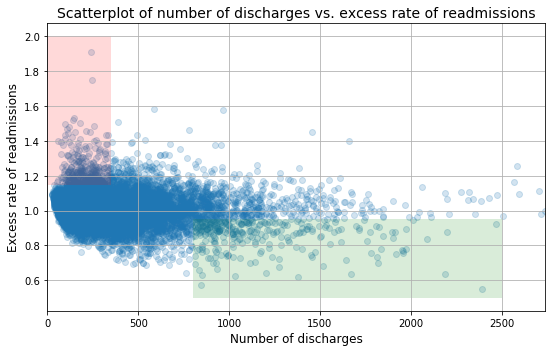

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

I agree that with the initial observations of the data and the statistics presented. However, I believe there could be additional rigor in the analysis especially in the claim that there is significant correlation between the continuous variables in question. The original author does not provide any hypothesis testing of the pearson correlation coefficient to demonstrate statistical significance and does not discuss the tradeoffs with practical significance. The recommendations seem strongly worded, but may be reconsidered based on hypothesis testing, practical significance evaluation, and a data visualization with more clarity.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

The pearson correlation is a dimensionless measure of the variability due to codependence (covariance) to the independent variability.

- Covariance = $\frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$

- Pearson Correlation Coefficient = $\rho$ = $\frac{Covariance}{(\sigma_x)(\sigma_y)}$

#### B.1. Setup an appropriate hypothesis test.

$H_0$: $\rho$ = 0

$H_1$: $\rho$ ≠ 0

$\alpha$ = 0.01


#### B.2. Compute and report the observed significance value (or p-value).

In [87]:
# Bootstrap approach
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute observed correlation: r_obs
r_obs = pearson_r(x, y)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    num_discharge_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(num_discharge_permuted,y)

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs)/len(perm_replicates)
print('Bootstrap average pearson correlation coefficient: {}'.format(np.mean(perm_replicates[0])))
print('Bootstrap test p-value =', p)

Bootstrap average pearson correlation coefficient: 0.0002236190214317408
Bootstrap test p-value = 0.0


In [88]:
# Frequentist Approach
import scipy.stats as stats
corr = stats.pearsonr(x,y)
print('Frequentist Pearson correlation coefficient: %.4f' %(corr[0]))
print('Frequentist Two-tailed test p-value: %.4f' %(corr[1]))

Frequentist Pearson correlation coefficient: -0.0931
Frequentist Two-tailed test p-value: 0.0000


#### B.3. Report statistical significance for  $\alpha$  = 0.01.

The two-tailed test p-value of 0.0000 is less than the significance level of 0.01, therefore we reject the null hypothesis, $H_0$: $\rho$ = 0, in favor of the alternate hypothesis, $H_1$: $\rho$ ≠ 0

Note: the p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so. However, we do have a sample size of 11494, therefore increasing our p-value reliability for this test.

#### B.4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Let's start with some definitions:
- Statistical Significance: Expresses the probability that the result of a given experiment or study could have occurred purely by chance.
- Practical Significance: Takes decisions based on the test statistic outcome factoring in all real work challenges and constraints.

In this particular problem, there is statistical signicance using a very large sample size of 11,494 samples. However, the result does not seem practically significant enough to merit a large change to policy. Practical significance, sometimes viewed as more of a business concern, may be quantified based on its effect size. The effect size is a quantitative measure of the magnitude of a phenomenon, i.e. the strength of an effect. Using the pearson correlation coefficient to measure the effect size, we calculated a coefficient of -0.09. Compared to the limit of -1, the value 0.09 seems quite low and informs me that there is weak negative  correlation between the discharges and readmission rates. I do not recommend that the hospitals upgrade or consolidate their facilities.

In [90]:
print('Sample size: ' + str(np.size(x)))

Sample size: 11494


#### B.5. Look at the scatterplot above.
- What are the advantages and disadvantages of using this plot to convey information?

The advantage of using a scatter plot with a low alpha value is that you may be able to have some idea of how two quanitities vary together and have a general sense of how the data is distributed. However, the disadvantage is that because the dataset is so large, it is still difficult to discern the high density regions even with a low alpha value (opacity parameter). Also, the portion of the graph with low numbers for discharge seems very dense and difficult to interpret.


- Construct another plot that conveys the same information in a more direct manner.

I will use a hexbin plot with log-log scale that is accompanied with a histogram at the top and right side of the visual using a built-in seaborn plot. A hexbin plot is generally considered a better way of visualizing large dataset compared to a scatterplot since it aggregates chunks of data. Using a log-log scales allows the reader to better visualize the outliers and allow a large range to be displayed without small values being compressed down to one side of the graph. The two histograms also provide another way of visualizing the distribution of each variable indepdendently since people can typically visualize bar lengths the best.

/Users/tsed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


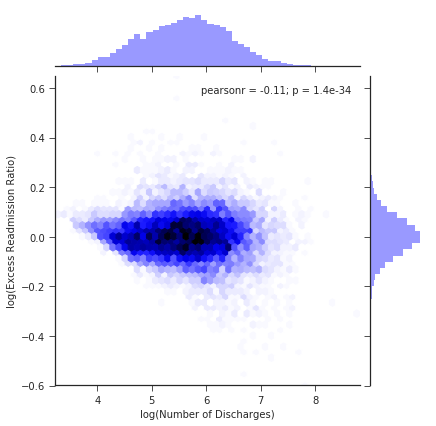

In [82]:
# Plot hex bins
import seaborn as sns
df = pd.DataFrame(clean_hospital_read_df, columns=["Number of Discharges", "Excess Readmission Ratio"])
with sns.axes_style("ticks"):
    hp = sns.jointplot(x=np.log(df["Number of Discharges"]), y=np.log(df["Excess Readmission Ratio"]), kind="hex", color = 'blue')
    hp.set_axis_labels("log(Number of Discharges)", "log(Excess Readmission Ratio)");